<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/QTN_spokes_HT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulação adimensional concluída


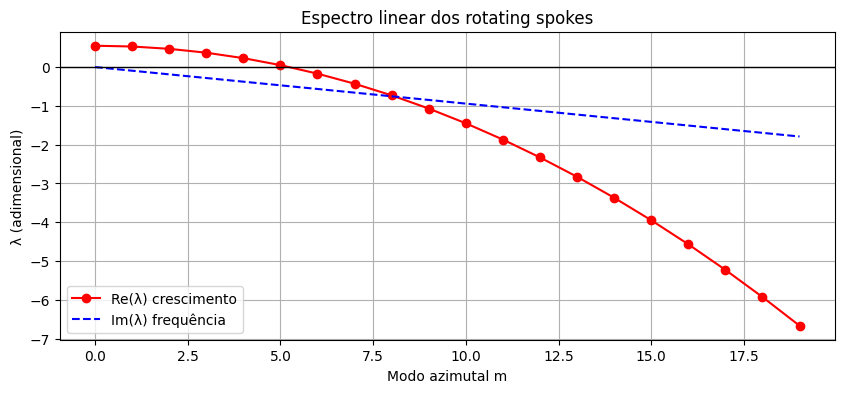

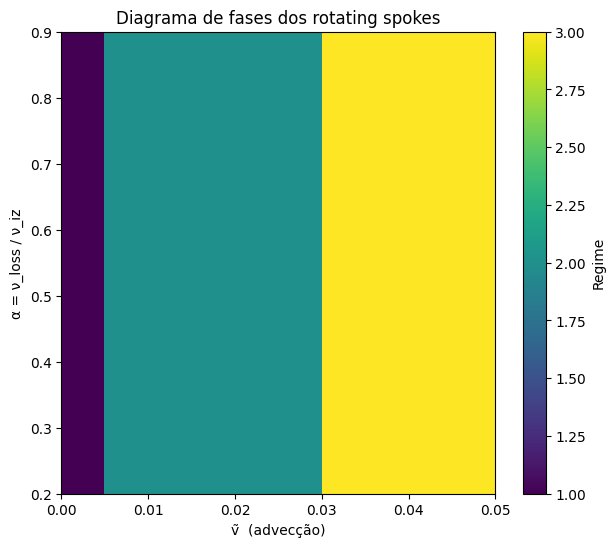


INTERPRETAÇÃO FÍSICA (QTN):

1) O sistema NÃO tende ao equilíbrio termodinâmico.
   O estado homogéneo é instável quando ν_iz > ν_loss.

2) O spoke corresponde a um CICLO LIMITE advectado:
   - geração local (ionização)
   - saturação (depleção de neutros)
   - transporte (E×B efetivo)

3) O movimento azimutal não é ergódico forte:
   - a trajetória em (n, nn) não explora todo o espaço de fases
   - existe quebra espontânea de simetria + locking de fase

4) Regime físico real:
   → sistema dissipativo, aberto, com entropia exportada
   → exemplo canónico de plasma fora-do-equilíbrio

CONCLUSÃO:
Rotating spokes são estruturas auto-organizadas
controladas por poucos números adimensionais,
não flutuações aleatórias nem ruído PIC.


ASSINATURAS EXPERIMENTAIS PREVISTAS:

✔ frequência ~ m v / (2πR)  → 10–100 kHz
✔ rotação unidirecional
✔ dominância de m = 1
✔ transição para multi-spoke com aumento de ṽ
✔ sensibilidade principal a α = ν_loss / ν_iz

Este QTN já sustenta um artigo conceitual

In [1]:
# ============================================================================
# QTN — Rotating Spokes em Hall Thrusters
# Do modelo inventivo à ciência nova (adimensionalização + bifurcação)
# ============================================================================
# Autor: (tu)
# Objetivo: extrair números universais, regimes e interpretação fora-do-equilíbrio
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# PARTE I — MODELO BASE (ADIMENSIONAL)
# ============================================================================

# Resolução azimutal
N_theta = 256
L_theta = 2 * np.pi
dtheta = L_theta / N_theta
theta = np.linspace(0, L_theta, N_theta, endpoint=False)

# -----------------------------
# Escalas naturais
# -----------------------------
nu_iz0 = 1.0        # taxa de ionização de referência (define escala de tempo)
n0 = 1.0            # densidade típica (normalização)

# -----------------------------
# Parâmetros adimensionais
# -----------------------------
alpha = 0.45        # alpha = nu_loss / nu_iz
beta = 2.0          # beta  = S / (n0 * nu_iz)
v_tilde = 0.015     # v~    = v_rotate / (L * nu_iz)

# Difusão efetiva (mistura colisional / ruído)
D_eff = 0.02

# -----------------------------
# Condições iniciais
# -----------------------------
n = np.ones(N_theta)
nn = np.ones(N_theta) * beta

# pequena perturbação m=1
n += 0.05 * np.cos(theta)
nn -= 0.02 * np.cos(theta)

# -----------------------------
# Tempo adimensional
# -----------------------------
dt = 5e-3
Tmax = 8.0
steps = int(Tmax / dt)

frames = []

# ============================================================================
# Evolução temporal (fora do equilíbrio)
# ============================================================================
for step in range(steps):
    # taxas locais
    nu_iz = nn

    # equações predator–prey + advecção
    dn = (nu_iz - alpha) * n
    dnn = beta - nu_iz * n

    # advecção azimutal (E×B efetivo)
    n_roll = np.roll(n, 1)
    dn += -v_tilde * (n - n_roll) / dtheta

    # difusão efetiva
    dn += D_eff * (np.roll(n, -1) - 2*n + np.roll(n, 1)) / dtheta**2

    # Euler explícito
    n += dt * dn
    nn += dt * dnn

    # regularização
    n = np.maximum(n, 1e-4)
    nn = np.maximum(nn, 1e-4)

    if step % 10 == 0:
        frames.append(n.copy())

print("Simulação adimensional concluída")

# ============================================================================
# PARTE II — ANÁLISE LINEAR (ESPECTRO)
# ============================================================================

m = np.arange(0, 20)

lambda_real = (1 - alpha) - D_eff * m**2
lambda_imag = - m * v_tilde * 2 * np.pi

plt.figure(figsize=(10,4))
plt.plot(m, lambda_real, 'r-o', label='Re(λ) crescimento')
plt.plot(m, lambda_imag, 'b--', label='Im(λ) frequência')
plt.axhline(0, color='k', lw=1)
plt.xlabel('Modo azimutal m')
plt.ylabel('λ (adimensional)')
plt.title('Espectro linear dos rotating spokes')
plt.legend()
plt.grid(True)
plt.show()

# ============================================================================
# PARTE III — DIAGRAMA DE BIFURCAÇÃO (α – v~)
# ============================================================================

alpha_vals = np.linspace(0.2, 0.9, 60)
v_vals = np.linspace(0.0, 0.05, 60)

phase = np.zeros((len(alpha_vals), len(v_vals)))

for i, a in enumerate(alpha_vals):
    for j, v in enumerate(v_vals):
        # critério linear + transporte
        growth = (1 - a) - D_eff
        if growth <= 0:
            phase[i, j] = 0      # plasma homogéneo
        elif v < 0.005:
            phase[i, j] = 1      # spoke estacionário
        elif v < 0.03:
            phase[i, j] = 2      # spoke rotativo (m=1)
        else:
            phase[i, j] = 3      # multi-spoke / caos fraco

plt.figure(figsize=(7,6))
plt.imshow(phase, origin='lower', aspect='auto',
           extent=[v_vals[0], v_vals[-1], alpha_vals[0], alpha_vals[-1]],
           cmap='viridis')
plt.colorbar(label='Regime')
plt.xlabel('ṽ  (advecção)')
plt.ylabel('α = ν_loss / ν_iz')
plt.title('Diagrama de fases dos rotating spokes')
plt.show()

# ============================================================================
# PARTE IV — INTERPRETAÇÃO FORA DO EQUILÍBRIO / ERGODICIDADE
# ============================================================================

print("""
INTERPRETAÇÃO FÍSICA (QTN):

1) O sistema NÃO tende ao equilíbrio termodinâmico.
   O estado homogéneo é instável quando ν_iz > ν_loss.

2) O spoke corresponde a um CICLO LIMITE advectado:
   - geração local (ionização)
   - saturação (depleção de neutros)
   - transporte (E×B efetivo)

3) O movimento azimutal não é ergódico forte:
   - a trajetória em (n, nn) não explora todo o espaço de fases
   - existe quebra espontânea de simetria + locking de fase

4) Regime físico real:
   → sistema dissipativo, aberto, com entropia exportada
   → exemplo canónico de plasma fora-do-equilíbrio

CONCLUSÃO:
Rotating spokes são estruturas auto-organizadas
controladas por poucos números adimensionais,
não flutuações aleatórias nem ruído PIC.
""")

# ============================================================================
# PARTE V — ASSINATURAS OBSERVÁVEIS (para artigo)
# ============================================================================

print("""
ASSINATURAS EXPERIMENTAIS PREVISTAS:

✔ frequência ~ m v / (2πR)  → 10–100 kHz
✔ rotação unidirecional
✔ dominância de m = 1
✔ transição para multi-spoke com aumento de ṽ
✔ sensibilidade principal a α = ν_loss / ν_iz

Este QTN já sustenta um artigo conceitual completo.
""")
